<p style="text-align:center">
    <a href="https://www.linkedin.com/company/mt-learners/" target="_blank">
    <img src="https://github.com/Mr-MeerMoazzam/Mr-MeerMoazzam/blob/main/Untitled-2.jpg?raw=true" width="200" alt="MT Learners Logo"  />
    </a>
</p>


# **Basics of Neural networks with SKlearn**


This notebook will demonstrate the implementation of neural networks for recognizing digits, a practical application. The scikit-learn library's **Multi-layer Perceptron (MLP)** classifier will be used for this purpose.



## Table of Contents

<ol>
    <li><a href="https://#Objectives">Objectives</a></li>
    <li>
        <a href="https://#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
        </ol>       
    </li>
    <li><a href="https://#Background">Background</a></li>
    <li><a href="#Example: Digit Recognition with Multi-layer Perceptron">Example: Digit Recognition with Multi-layer Perceptron</a></li>
    
</ol>



## Objectives

After completing this notebook you will be able to:

*   Apply MLP for classification tasks
*   Use RandomizedSearchCV to search for an optimal set of model parameters  


## Setup


For this notebook, we will be using the following libraries:

*   `numpy` for mathematical operations.
*   `Scikit-learn` for machine learning.
*   `Pandas` for data manipulation and analysis.
*   `matplotlib` for additional plotting tools.


### Installing Required Libraries


In [ ]:
!pip install matplotlib numpy sklearn pandas

### Importing Required Libraries

*I recommend you import all required libraries in one place:*


In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report


## Background


The scikit-learn library is widely recognized for its effective and efficient tools for performing Machine Learning and Statistical Learning tasks, such as regression, classification, and clustering. The library provides an interface that enables us to work with neural networks, particularly the Multi-layer Perceptron (MLP) class.

A **Multilayer Perceptron (MLP)** is a type of feedforward artificial neural network (ANN) that is fully connected. It has three or more layers of nodes, including an input layer, one or more hidden layers, and an output layer. Each layer, except the input layer, contains neurons that use non-linear activation functions such as ReLu to learn complex and abstract features in the input.

The MLPClassifier class, which is a part of scikit-learn, uses the backpropagation supervised learning technique to train the neural network. The model's multiple layers and non-linear activation functions make it capable of distinguishing data that is not linearly separable.

It is worth noting that MLP models with a single hidden layer are sometimes referred to as **"vanilla"** neural networks.

<center><img src="https://www.researchgate.net/publication/260321700/figure/fig1/AS:296985614667776@1447818296312/Structure-of-a-one-hidden-layer-MLP-Network.png" width="50%"></center>

<center>Illustration of One hidden layer MLP</center>


## Example: Digit Recognition with MLP (Multi-layer Perceptron)

Using the MLPClassifier function from scikit-learn, this example aims to create a basic neural network that accurately identifies digits from a large dataset containing thousands of handwritten images.
Let's download the digits dataset [download](https://drive.google.com/file/d/1I3NO91m3Z91fEilb9W5v0-VKRVEyfbRH/view?usp=share_link)


In [2]:
digits = pd.read_csv("digits.csv")

labels = digits['label']
digits = np.array(digits.drop('label', axis=1)).astype('float')
digits.shape, labels.shape

((42000, 784), (42000,))

There are 42,000 digit images and each has 784 pixels, which means we can reshape them into $28\times28$ images for displaying.


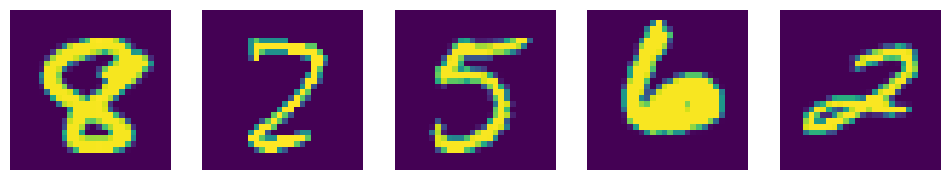

In [3]:
plt.figure(figsize=(12,4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(random.choice(digits).reshape(28,28))
    plt.axis("off")

Let's split the 42,000 images into train and test sets.


In [4]:
split = 0.7, 0.3 # train, test
# normalize data
digits /= 255.0

split_ind = int(len(digits)*split[0])
X_train, X_test, y_train, y_test = digits[:split_ind], digits[split_ind:], labels[:split_ind], labels[split_ind:]
X_train.shape, X_test.shape

((29399, 784), (12601, 784))

With scikit-learn's **MLPClassifier**, we can utilize the GridSearch cross validation method to optimize the following parameters:

- **hidden_layer_sizes: _tuple, length = n_layers - 2, default=(100,)_**. The ith element represents the number of neurons in the ith hidden layer.

- **alpha: _float, default=0.0001_**. Strength of the L2 regularization term. The L2 regularization term is divided by the sample size when added to the loss.

- **max_iter: _int, default=200_**. Maximum number of iterations. The solver iterates until convergence (determined by ‘tol’) or this number of iterations. For stochastic solvers (‘sgd’, ‘adam’), note that this determines the number of epochs (how many times each data point will be used), not the number of gradient steps.

- **learning_rate_init: _float, default=0.001_**. The initial learning rate used. It controls the step-size in updating the weights. Only used when solver=’sgd’ or ‘adam’.


Before we search for an optimal set of parameters, let's start with a vanilla MLPClassifier:


In [5]:
model = MLPClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Using MLPClassifier with the default parameter values gives an accuracy of {accuracy_score(y_pred, y_test)}")

Using MLPClassifier with the default parameter values gives an accuracy of 0.970954686136021


In [6]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1269
           1       0.99      0.98      0.98      1424
           2       0.96      0.97      0.97      1215
           3       0.96      0.97      0.96      1306
           4       0.97      0.98      0.97      1173
           5       0.96      0.97      0.97      1126
           6       0.98      0.98      0.98      1234
           7       0.98      0.98      0.98      1331
           8       0.98      0.95      0.96      1264
           9       0.95      0.96      0.96      1259

    accuracy                           0.97     12601
   macro avg       0.97      0.97      0.97     12601
weighted avg       0.97      0.97      0.97     12601



When performing cross-validation training, the default activation function "relu" and default solver "adam" will be used. By using the "RandomizedSearchCV" method instead of "GridSearchCV," the training time can be reduced. This is because RandomizedSearchCV samples a fixed number of parameter settings from specified distributions, rather than trying out all parameter values like GridSearchCV. The figure below shows the difference between the two methods.
<center><img src="https://www.researchgate.net/publication/341691661/figure/fig2/AS:896464364507139@1590745168758/Comparison-between-a-grid-search-and-b-random-search-for-hyper-parameter-tuning-The.png" width="65%"></center>


The GridSearchCV method produces an even distribution of points in the parameter space, which means that both important and unimportant parameters are explored equally. This results in inefficient trials, as we would want the important parameters to have more coverage in the trials. On the other hand, RandomizedSearchCV produces an uneven distribution of points in the parameter space, allowing for more exploration of distinct values in the important parameter space. It is difficult to determine ahead of time which parameter subspaces are more important, so using a strict, even grid for parameter search would not be an ideal or efficient approach.



However, despite the fact that we will use a more efficient search method since we are trying out multiple values for mutiple parameters of a neural network , **you should still expect training time to be much longer than training a single model**.


In [7]:
parameters = {'hidden_layer_sizes':[50, 100, 200],
              'alpha': [0.001, 0.01, 0.1], 
              'max_iter': [200, 500, 800], 
              'learning_rate_init':[0.0001, 0.001, 0.01, 0.1]}

model = MLPClassifier()
clf = RandomizedSearchCV(estimator=model, param_distributions=parameters, cv=5)
clf.fit(X_train[:3000], y_train[:3000]) # reduce the train set size to shorten the training time

print("The best parameter values found are:\n")
print(clf.best_params_)

# store the best model found in "bestmodel"
bestmodel = clf.best_estimator_

The best parameter values found are:

{'max_iter': 200, 'learning_rate_init': 0.001, 'hidden_layer_sizes': 200, 'alpha': 0.1}


Now we can use the **bestmodel**, which uses the most optimal set of parameter values found by RandomSearchCV, cross-validated on a subset of the training set, to make predictions for the test set **X_test** and evaluate its performance.

You select the best regularization  method using the validation data.


The accuracy score of the best model is 0.9385763034679787



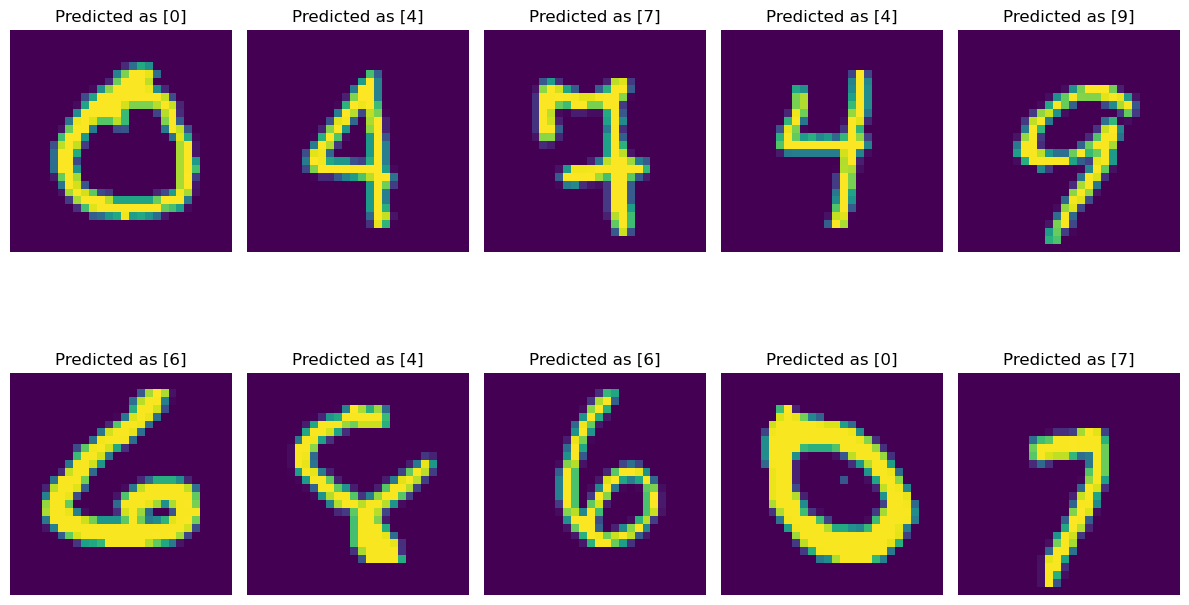

In [8]:
y_pred = bestmodel.predict(X_test)
print(f"The accuracy score of the best model is {accuracy_score(y_test, y_pred)}\n")

plt.figure(figsize=(12,8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    sample = random.choice(X_test)
    plt.imshow(sample.reshape(28,28))
    pred = bestmodel.predict(sample.reshape(1,-1))
    plt.title(f"Predicted as {pred}")
    plt.axis("off")

plt.tight_layout()

The accuracy of our model is around 93% and the 10 random samples from the test set are all predicted correctly, which is pretty nice. 


## Authors


[Moazzam Ali](https://www.linkedin.com/in/moazzam-ali-6a9675237/) is a Associate ML Engineer and CEO of [MT Learners](https://www.linkedin.com/company/mt-learners/).
